# Introduction to Neural Networks using Scikit-learn

In this tutorial we are going to use scikit-learn to work with artificial neural networks. We are going to use Multilayer Perceptron (MLP) networks for classification and regression tasks. In addition, we are going to visualise the weights of a MLP network using an image dataset.

## Classification MLP

We are going to start by using an MLP network and the Iris dataset to learn how to use neural networks in scikit-learn for classification tasks. The Iris dataset contains information (Sepal Length, Sepal Width, Petal Length and Petal Width) on 150 iris flowers and their corresponding flower type label (Setosa, Versicolour, and Virginica).

Let's visualize the data using two of the variables for each flower and colour code each data point using the corresponding labels:

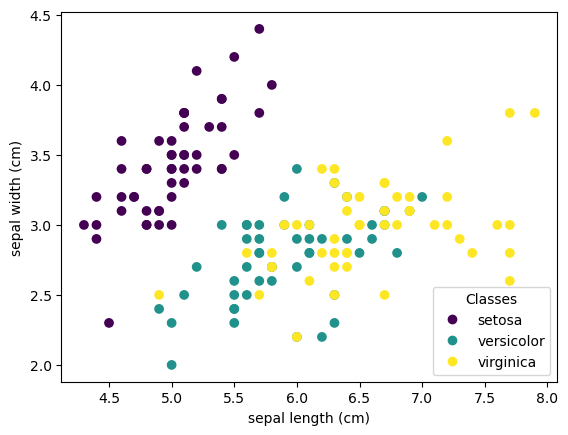

In [4]:
# Import and load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Create scatter plot of the dataset using two features
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

<span style="color:orange">TO DO: Try to visualise the dataset using other combinations of variables? Try 3-D plot, is that helpful?</span>

Even using only two variables it is easy to see some separation between Iris types/classes.

Let's now use all the featues and a MLP network to classify each fower type.

In [8]:
# Load functionality to partition data into train and test
from sklearn.model_selection import train_test_split

# Load MLP neural network model from scikit-learn
from sklearn.neural_network import MLPClassifier

# Load functionality to prepare data for neural network
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# SPlit data into train and test/validation datasets (use 10% of the data for validation)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

# Create MLP neural network classifier object with one single layer with 5 neurons
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)

# Create pipeline that preprocesses (standardises) and trains MLP model
pipeline = make_pipeline(StandardScaler(), mlp_clf)

# Run pipeline (standardises that and trains model)
pipeline.fit(X_train, y_train)

# Calculate accuracy (number of correctly classified data points divided by total number of datapoints in the validation dataset)
accuracy = pipeline.score(X_valid, y_valid)

# Print accuracy
print(f'Accuracy of MLP classifier: {accuracy*100}%')

Accuracy of MLP classifier: 100.0%


The activation function used by the MLPClassifier by default is the 'relu' function. The following plot shows how the different activation functions look like:

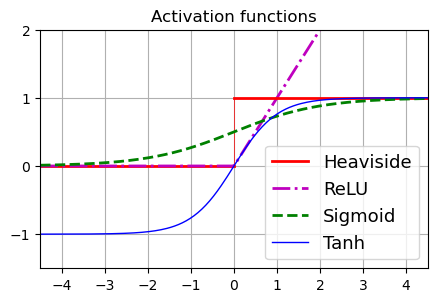

In [27]:
# Import numpy and the sigmoid function
import numpy as np
from scipy.special import expit as sigmoid

# Define relu function
def relu(z):
    return np.maximum(0, z)

# Create plot
max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))
plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.5, 2])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

## Regression MLP

Now let's use MLP neural networks for regression. For this we will re-use the Californian housing dataset from our previous tutorial, also available from scikit-learn. The workflow for regression is similar to classification.

In [31]:
# Import housing dataset and load data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Import mean squared error from metrics module
from sklearn.metrics import mean_squared_error

# Import MLPRegressor neural network
from sklearn.neural_network import MLPRegressor

# Split data into train and test/validation datasets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Create MLPRegressor object with 3 hidden layers of 50 neurons each
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

# Create pipeline for preprocessing data (standardise) and MLP model
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# Preprocess and train model
pipeline.fit(X_train, y_train)

# Make predictions on the validation/test set
y_pred = pipeline.predict(X_valid)

# Calculate mean squared error
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Print accuracy
print(f'Mean squared error: {rmse:.3f}')

Mean squared error: 0.505


<span style="color:orange">TO DO: How does compare with other regression models such as Linear Regression or Random Forests?</span>

## Visualising 

Finaly with 